In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from zipfile import ZipFile
from functools import reduce

# Here we focus on fer

In [ ]:
!pip install -q gdown httpimport
!gdown 'https://github.com/wenjie-hoo/baltic_ml/raw/main/2022.11.07-merged-single-observation.zip'

In [3]:
zip_file = ZipFile('./2022.11.07-merged-single-observation.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv') and not text_file.filename[37:].startswith('.')}

df_list=[]
for df in dfs.values():
       df['DATE'] = pd.to_datetime(df['DATE'],dayfirst = True)
       df_list.append(df)

df = reduce(lambda left,right: pd.merge(left.drop_duplicates(subset=['DATE','DEPTH']),right.drop_duplicates(subset=['DATE','DEPTH']),on=['DATE','DEPTH'],how='outer'), df_list)
# df.to_csv('xxxxx.csv')

/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T/ipykernel_84925/2948910284.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':10})


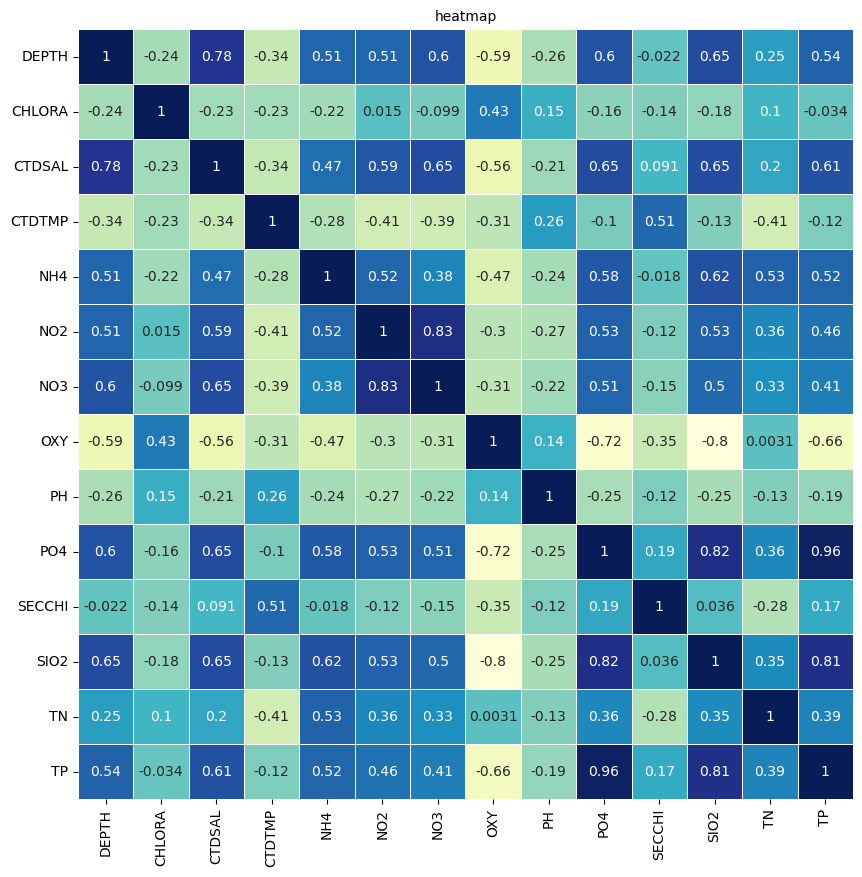

In [63]:
# df.dropna(inplace=True)

fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('heatmap',fontsize=10)
plt.show()

|  element  | shortened form  |
|  ----  | ----  |
|Dissolved oxygen |  OXY|
|Phosphate | PO4|
|Total phosphorus | TP|
|Nitrogen dioxide | NO2|
|Nitrate | NO3|
|Ammonia | NH4|
|Total nitrogen | TN|
|Silicon dioxide | SIO2|
|Chlorophyll | CHLORA|
|Secchi depth | SECCHI|
|Dissolved Inorganic Carbon (DIC) | PH|
|Salinity | CTDSAL|
|Centigrade Temperature | CTDTMP|

In [54]:
def group_by_year(df, par):
    df =  df.groupby(df['DATE'].dt.year)[par].mean()
    return pd.DataFrame({"DATE":df.index, par:df.values})

Text(0.5, 1.0, 'TP')

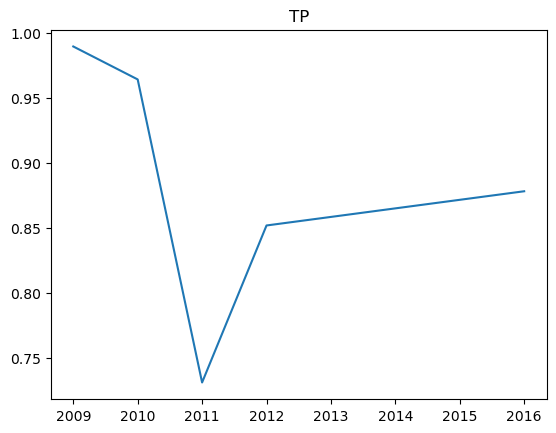

In [64]:
df_tp =df[df['DEPTH'] == 500]
df_tp = group_by_year(df,'TP')
df_tp.dropna(inplace=True)
df_tp.head
# plt.plot(df_tp['DATE'],df_tp['TP'])
# plt.title('TP')